<h3><b>Introduction to Data Analytics - Exercise set 4, exercise 2</b></h3>
<h4><b>Honey production dataset</b></h4>
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_4/honey.png" />

<b>Tip:</b> You can just click "Run All" to see the results of this notebook. Some of these exercises have some heavy plots that can take even 1 minute to produce.

<b>Remember:</b> not every dataset has interesting correlations and/or features (too much randomness or variance usually, or not enough data). Also, not each correlation implies there's a causation. Finally, not every plot is useful, that's why it's important to try multiple plots in order to "see under the hood". Typically pair plots, joint plots, regression plots, heatmaps and box plots are most useful, but there are some exceptions too.

<h3><b>Quick summary of data:</b></h3>

<p>This dataset contains a sample of honey production in USA from various different states, from years 1995 to 2021. There are many interesting variables in the dataset, including production (colonies number * yield per colony), value of production (production * average price), amount of stocks owned by the producer, average price, colony number and yield per colony.</p>
<p>This notebook uses heavily the quantile -feature in the query-function in pandas. This allows us to inspect to the top 25% honey companies in the set based on production, as well se companies in the 25-50%, 50-75% quantiles as well as lowest 25% companies.See code comments for more details what has been done with the dataset.</p>
<p>Kaggle page: <a href="https://www.kaggle.com/datasets/mohitpoudel/us-honey-production-19952021">https://www.kaggle.com/datasets/mohitpoudel/us-honey-production-19952021</a></p>

<h3><b>Questions for this exercise:</b></h3>
<b>Answer the questions either as code comments or as markdown. Use separate cells to write your answers.</b><br/><br/>
<li>Can you find any states that have got more successful in terms of different variables in this dataset?</li>
<li>Something has happened to honey production overall during the years. Which variables show this best? Can you find anything with Google why this phenomenon might have a happened?</li>
<li>Which seaborn plots are useful in this notebook, and which are not? Why? (you can remove the unnecessary plots from this notebook if you wish too). Note: there are many not-so-useful plots in this notebook.</li>
<li>Which are more useful in this case, correlations or plots? Or are they both useful?</li>
<li>How does the hue change the perspective of the data in the regression plots?</li>

<b>Extra questions/tasks for extra points:</b>
<li>If you find new insight or features in this dataset by using some other plots and/or pandas tricks, you can do so. In that case, please create a new section for the needed code cells you created accompanied with either code comments or markdown.  </li>
<li>Any other ideas about this dataset? Any ways to expand or improve the dataset and the analysis?</li>
<li>This notebook mostly concentrates on the most productive honey producers. You can also inspect different quantiles (df2, df3, df4). Are there any differences when compared to the top DataFrame?</li>


<hr />

<b style="color: red;">Place your answers here!</b>

#### Can you find any states that have got more successful in terms of different variables in this dataset?
Regression plot for value of production and year, hue on state show that North Dakota is successful.<br>
Regression plot for colonies number and stocks, hue on state show that California has high colony numbers



#### Something has happened to honey production overall during the years. Which variables show this best? Can you find anything with Google why this phenomenon might have a happened?
Colony Numbers, Yield per Colony and Production Stocks are key variables to represent the change.
A major factor, since the early 1990s, in honey production has been the changing climate, with rising temperatures, altered rainfall patterns and extreme weather events wreaking havoc upon many beekeepers and their broods.
Source: https://www.theguardian.com/environment/2024/jan/08/declining-honey-yields-bees-research#:~:text=A%20major%20factor%2C%20since%20the,many%20beekeepers%20and%20their%20broods.

#### Which seaborn plots are useful in this notebook, and which are not? Why? (you can remove the unnecessary plots from this notebook if you wish too). Note: there are many not-so-useful plots in this notebook
1. sns.pairplot(df1, hue="state") shows different states across many variables.
2. sns.lmplot(x='year', y='value_of_production', data=df1, hue='state') shows value of production across year for each state.
3. sns.heatmap(correlations, annot=True) shows correlation between variables. 
#### Note useful
1. sns.pairplot(df1) gives less information. 
2. sns.boxplot(x='decade', y='production', data=df_four_big, hue='state') shows the same insights which are provided already by others.

#### Which are more useful in this case, correlations or plots? Or are they both useful?
Both are useful, with correlation we can find important relationship.

#### How does the hue change the perspective of the data in the regression plots

Adding hue gives deeper details from different columns for example here: sns.pairplot(df1) without hue, can you see general insights but sns.pairplot(df1, hue="state") shows deeper details.

<hr />

<h4><b>Imports and load the original dataset</b></h4>

In [1]:
# import the common data analytics modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h4><b>Load the dataset and clean up data</b></h4>

In [2]:
# load the dataset and remove first column (duplicate index)
df = pd.read_csv("US_honey_dataset.csv")
del df[df.columns[0]]

# let's see how many different states we have here (44 in total)
states = df['state'].value_counts()
print(states)

print("\nAmount of different states:")
print(len(states))

# create a helper DataFrame and group by state and production
values = df.groupby('state').sum().sort_values(by=['production'], ascending=False)

# get lists of states by production, one for each 25% quantile
df_highest = list(values.query('production >= production.quantile(q=0.75)').index)
df_average_plus = list(values.query('production >= production.quantile(q=0.50) and production < production.quantile(q=0.75)').index)
df_average_minus = list(values.query('production >= production.quantile(q=0.25) and production < production.quantile(q=0.50)').index)
df_lowest = list(values.query('production < production.quantile(q=0.25)').index)

# filter the corresponding states into their DataFrames
df1 = df[df['state'].isin(df_highest)]
df2 = df[df['state'].isin(df_average_plus)]
df3 = df[df['state'].isin(df_average_minus)]
df4 = df[df['state'].isin(df_lowest)]

# let's save the correlation matrices too
correlations = df.corr(numeric_only=True)
correlations1 = df1.corr(numeric_only=True)
correlations2 = df2.corr(numeric_only=True)
correlations3 = df3.corr(numeric_only=True)
correlations4 = df4.corr(numeric_only=True)

# the data is otherwise fairly clean

state
Alabama          27
Arizona          27
Arkansas         27
California       27
Colorado         27
Florida          27
Georgia          27
Hawaii           27
Idaho            27
Illinois         27
Indiana          27
Iowa             27
Kansas           27
Louisiana        27
Maine            27
Michigan         27
Mississippi      27
Minnesota        27
Montana          27
Missouri         27
NorthCarolina    27
NewYork          27
Nebraska         27
NewJersey        27
Pennsylvania     27
Oregon           27
Ohio             27
NorthDakota      27
Washington       27
WestVirginia     27
Vermont          27
Virginia         27
Tennessee        27
SouthDakota      27
Utah             27
Texas            27
Wisconsin        27
Wyoming          27
Kentucky         26
NewMexico        18
Nevada           15
SouthCarolina    12
Maryland          9
Oklahoma          9
Name: count, dtype: int64

Amount of different states:
44


<hr>

<b>Extra questions/tasks for extra points:</b>

In [70]:
state_average = df1.groupby('state')[['yield_per_colony', 'production', 'value_of_production']].mean().sort_values(by='value_of_production', ascending=False)
state_average.reset_index()

,state,yield_per_colony,production,value_of_production
0,NorthDakota,83.925926,1.902748e+07,4.393404e+07
1,California,52.814815,1.569911e+07,2.422156e+07
2,SouthDakota,72.222222,1.317504e+07,2.292944e+07
3,Florida,72.444444,1.040496e+07,1.887667e+07
4,Montana,79.555556,7.302704e+06,1.505789e+07
5,Minnesota,69.814815,6.540037e+06,1.149859e+07
6,Texas,71.148148,4.794111e+06,1.054519e+07
7,Michigan,64.925926,3.743074e+06,8.068185e+06
8,NewYork,64.629630,2.905333e+06,6.589667e+06
9,Wisconsin,70.222222,3.700333e+06,6.534889e+06


 North Dakota is successful state based on this grouping.

<hr>

<h4><b>seaborn plotting - pair plots</b></h4>

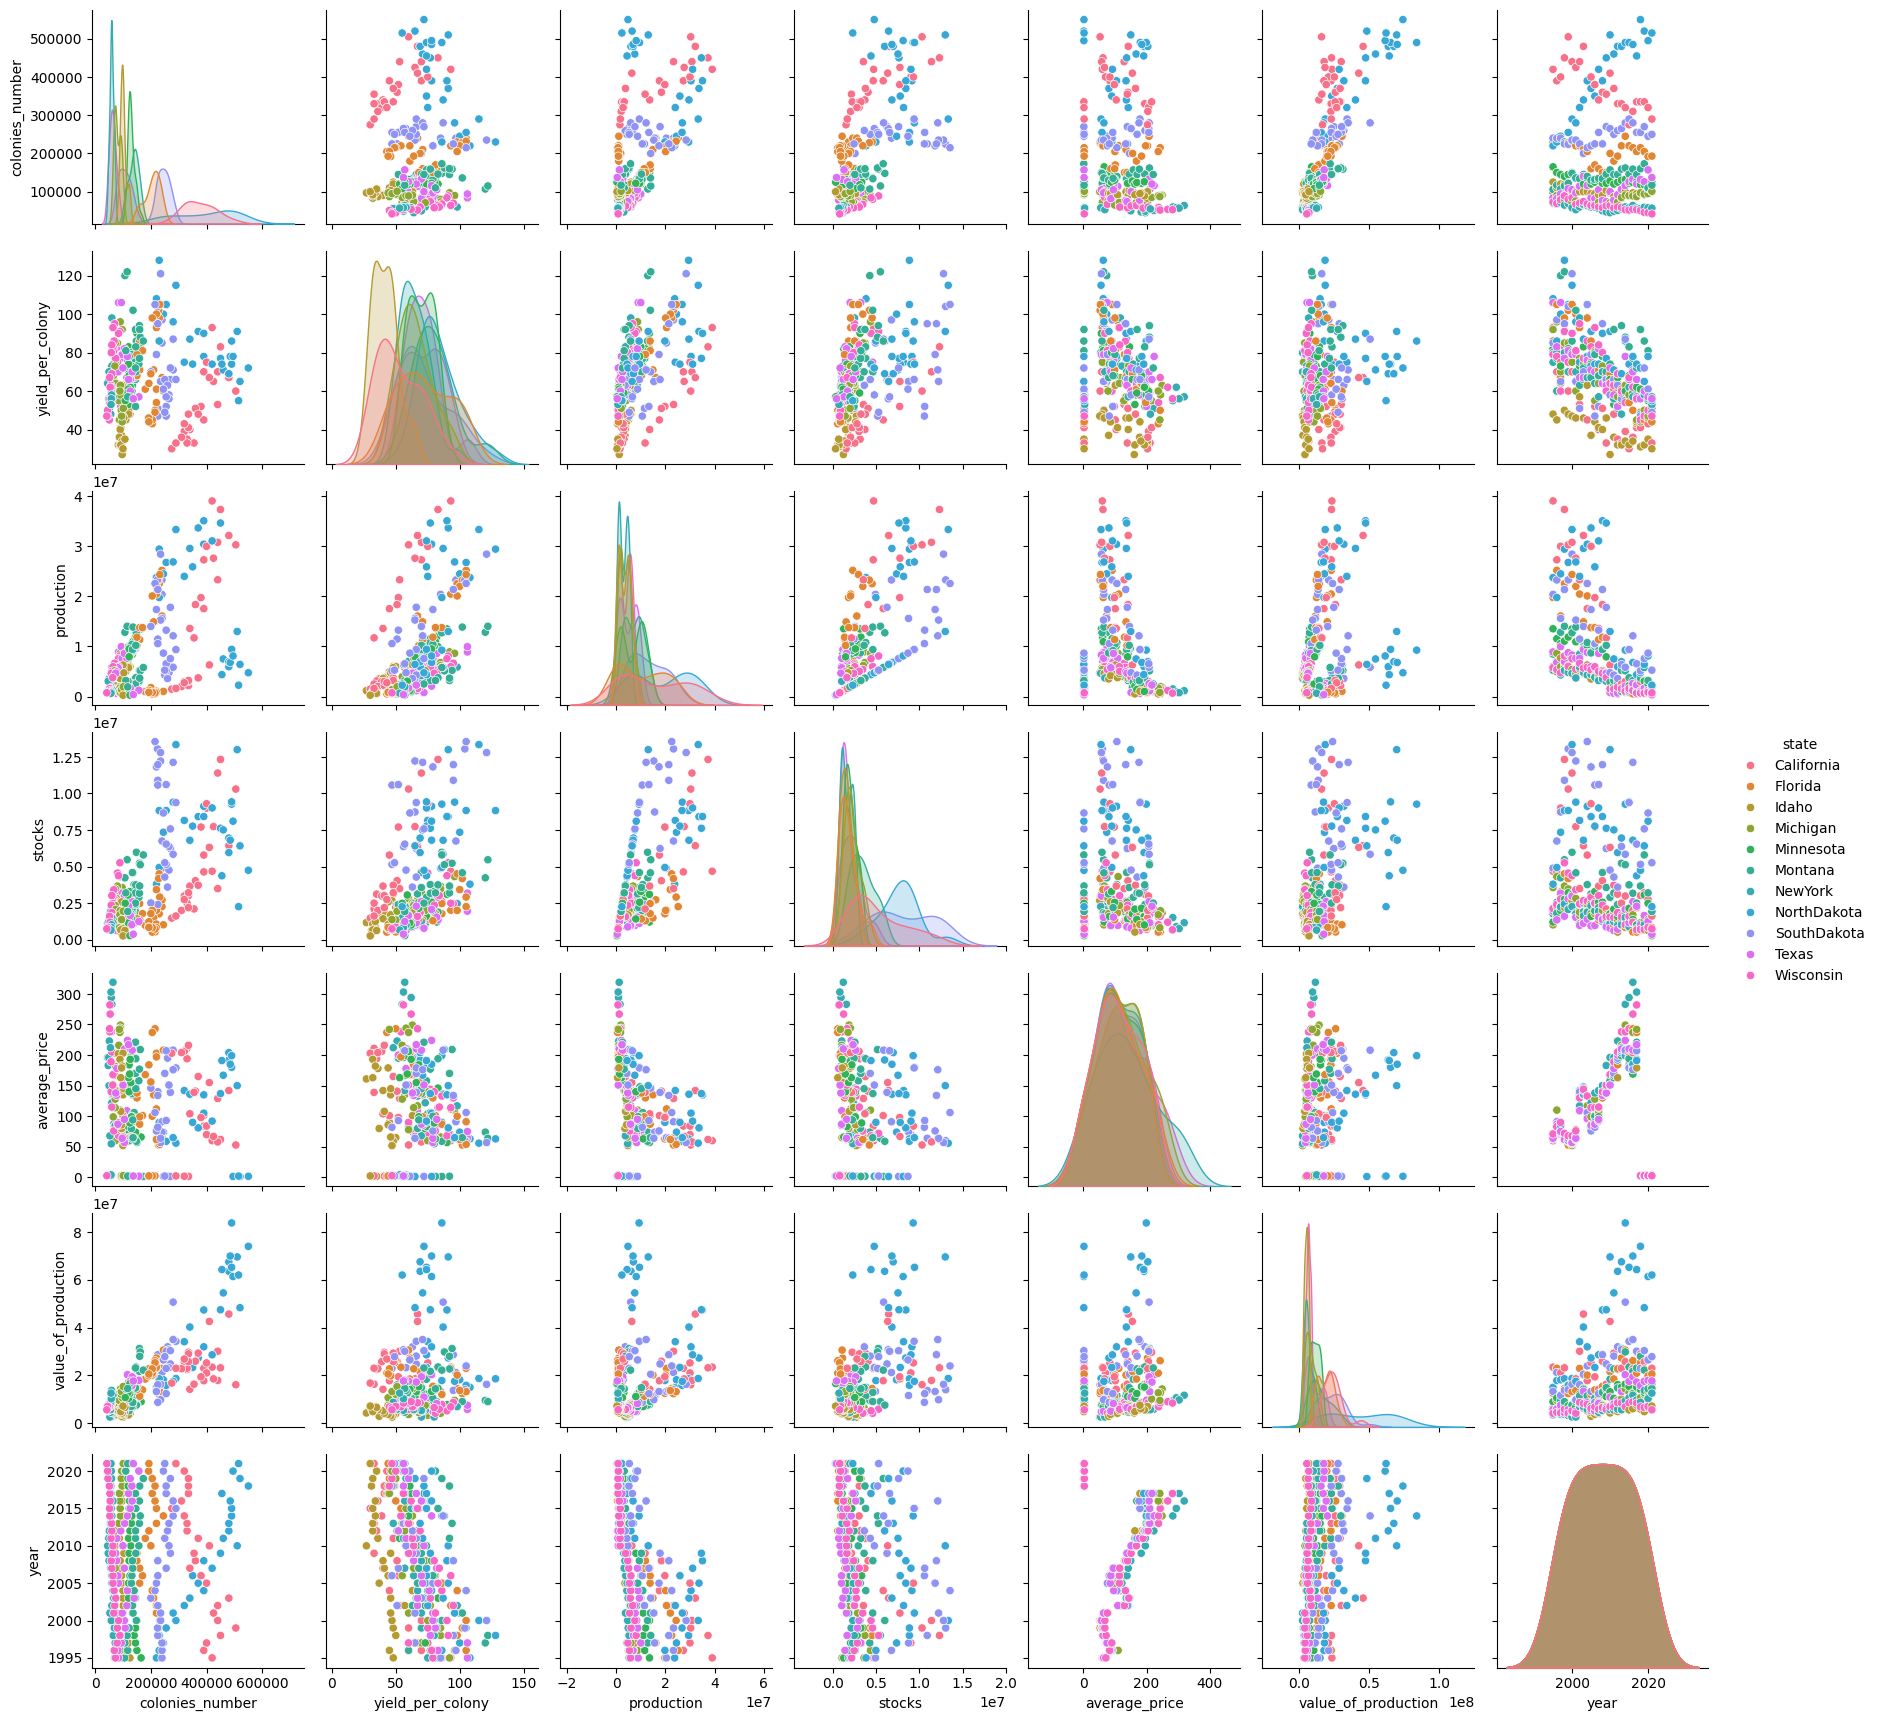

In [4]:
# pair plot, hue on state
sns.pairplot(df1, hue="state")

<h4><b>seaborn plotting - regression plots</b></h4>

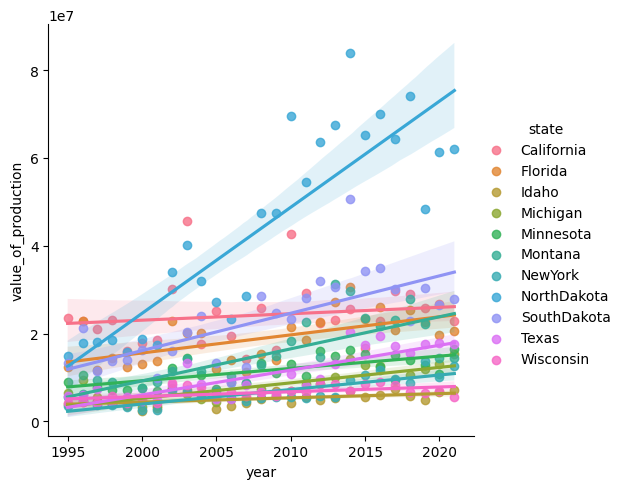

In [6]:
# regression plot for value of production and year, hue on state
sns.lmplot(x='year', y='value_of_production', data=df1, hue='state')

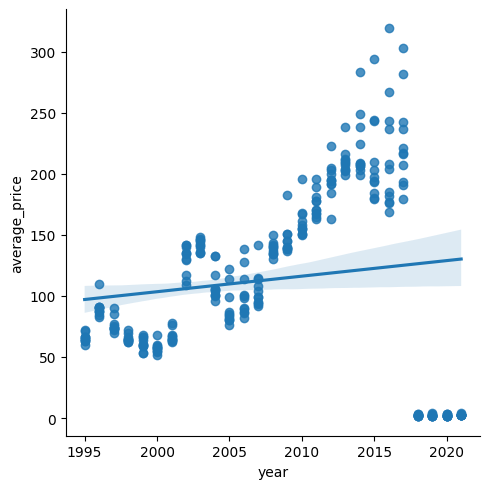

In [7]:
# regression plot for value of average price and year
sns.lmplot(x='year', y='average_price', data=df1)

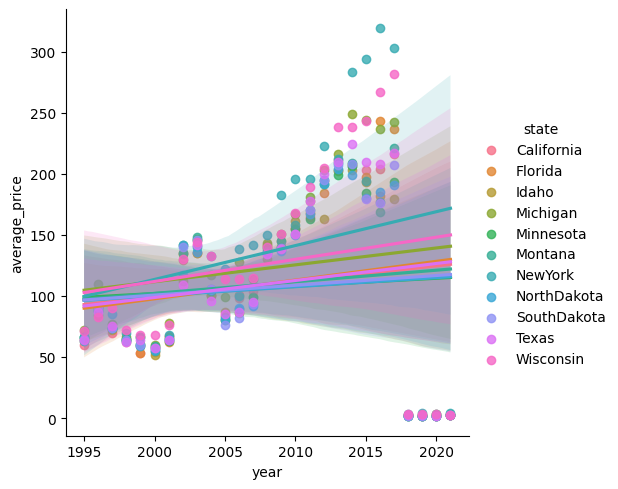

In [8]:
# regression plot for value of average price and year, hue on state
sns.lmplot(x='year', y='average_price', data=df1, hue='state')

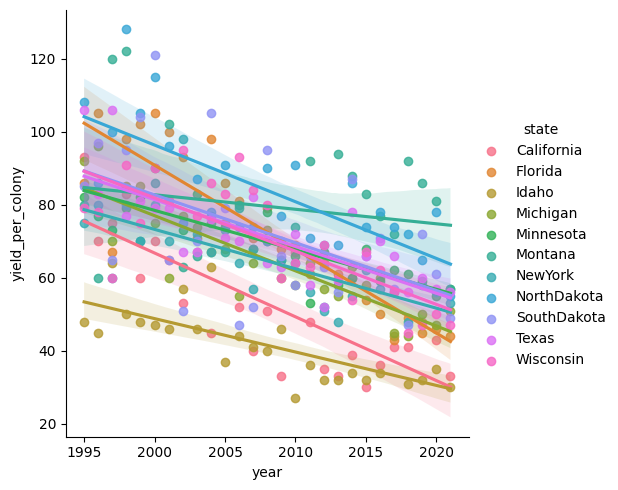

In [10]:
# regression plot for yield per colony and year, hue on state
sns.lmplot(x='year', y='yield_per_colony', data=df1, hue='state')

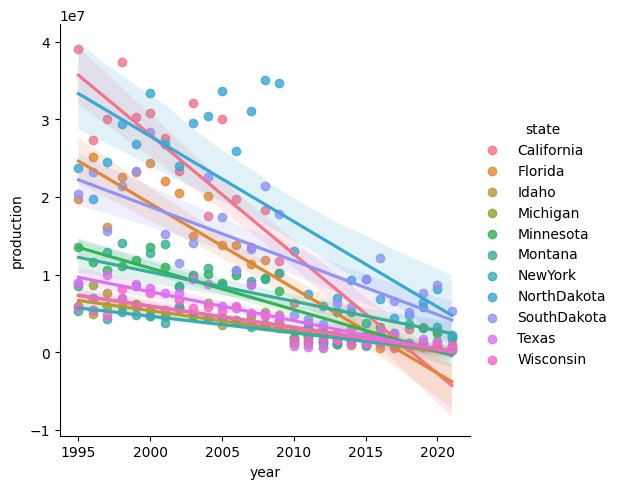

In [12]:
# regression plot for production and year, hue on state
sns.lmplot(x='year', y='production', data=df1, hue='state')

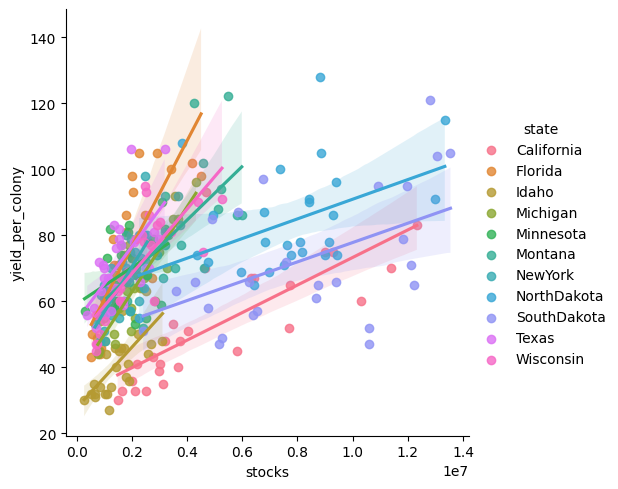

In [14]:
# regression plot for yield per colony and stocks, hue on state
sns.lmplot(x='stocks', y='yield_per_colony', data=df1, hue='state')

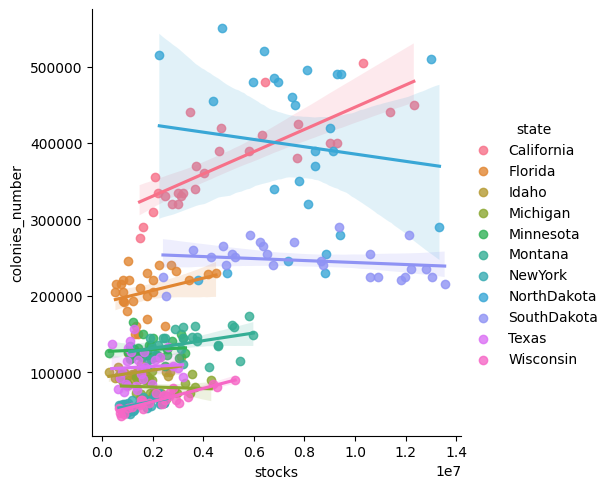

In [16]:
# regression plot for colonies number and stocks, hue on state
sns.lmplot(x='stocks', y='colonies_number', data=df1, hue='state')

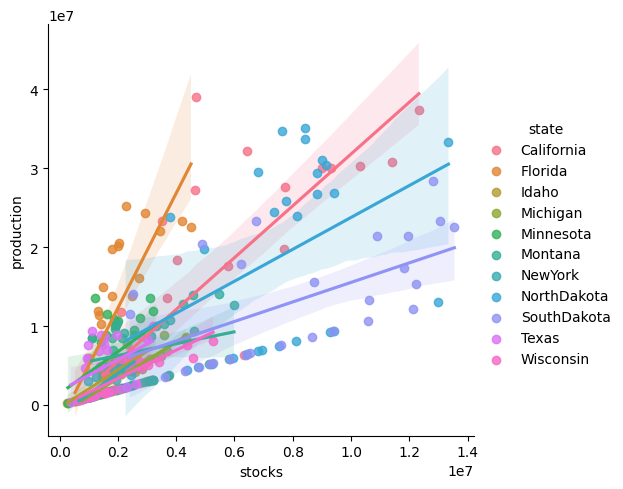

In [18]:
# regression plot for production and stocks, hue on state
sns.lmplot(x='stocks', y='production', data=df1, hue='state')

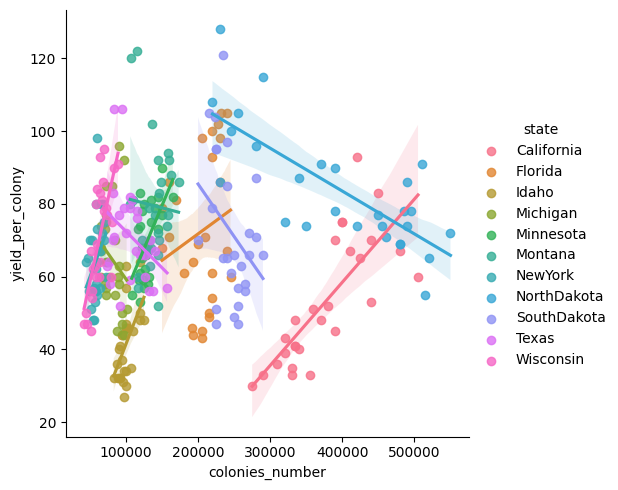

In [20]:
# regression plot for yield per colony and colonies number, hue on state
sns.lmplot(x='colonies_number', y='yield_per_colony', data=df1, hue='state')

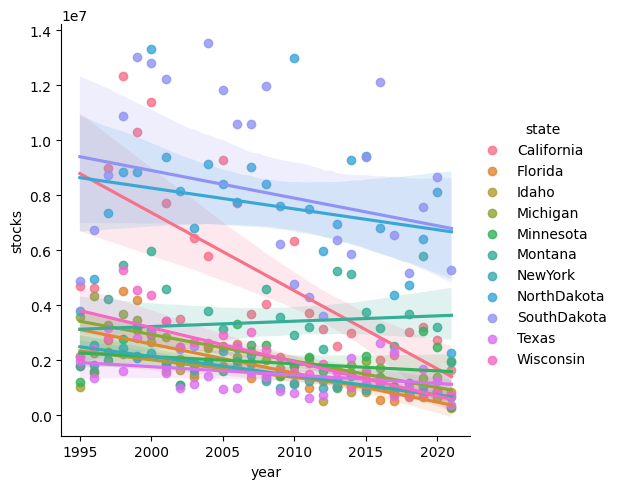

In [22]:
# regression plot for stocks and year, hue on state
sns.lmplot(x='year', y='stocks', data=df1, hue='state')

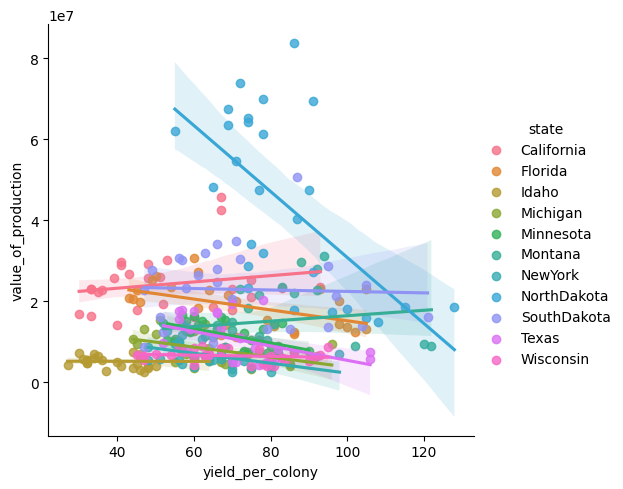

In [24]:
# regression plot for value of production and yield per colony, hue on state
sns.lmplot(x='yield_per_colony', y='value_of_production', data=df1, hue='state')

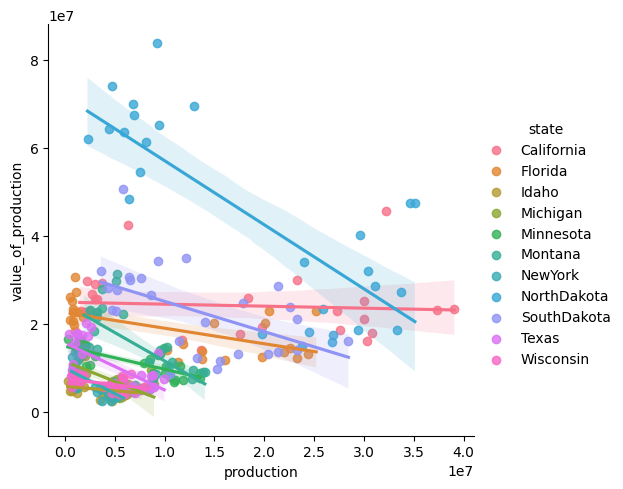

In [26]:
# regression plot for value of production and production, hue on state
sns.lmplot(x='production', y='value_of_production', data=df1, hue='state')

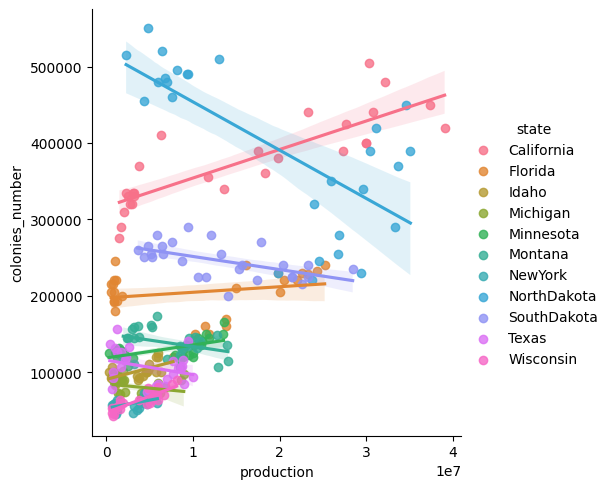

In [28]:
# regression plot for colonies number and production, hue on state
sns.lmplot(x='production', y='colonies_number', data=df1, hue='state')

<h4><b>seaborn plotting - box plots</b></h4>

<Axes: xlabel='state', ylabel='production'>

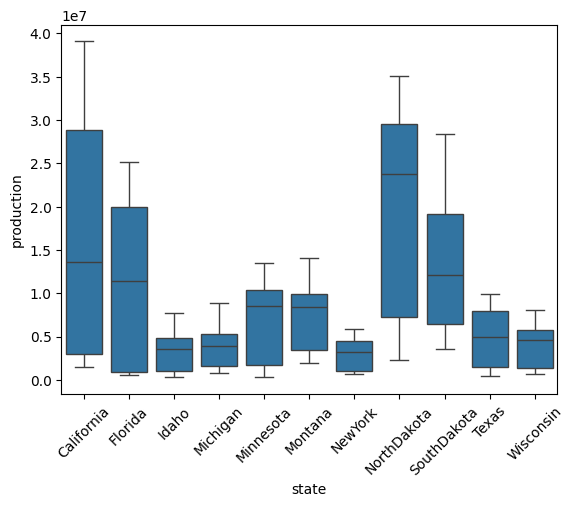

In [29]:
# box plot on state and production, tilt x-labels a little so we can see them better
plt.xticks(rotation=45)
sns.boxplot(x='state', y='production', data=df1)

In [30]:
# just out of curiosity... can be see something if we use decades instead of years 
# for boxplot (too many different years for a boxplot otherwise)
df_four_big = df[df['state'].isin(['California', 'Florida', 'NorthDakota', 'SouthDakota'])].copy()

def create_year_spans(row):
    year = int(row['year'])
    
    if year < 2000:
        return 1990
    elif 2000 <= year <= 2010:
        return 2000
    else:
        return 2010

# create new column for decade and drop original year
df_four_big['decade'] = df_four_big.apply(create_year_spans, axis=1)
df_four_big = df_four_big.drop('year', axis=1)

<h4><b>seaborn plotting - heatmaps</b></h4>

<Axes: >

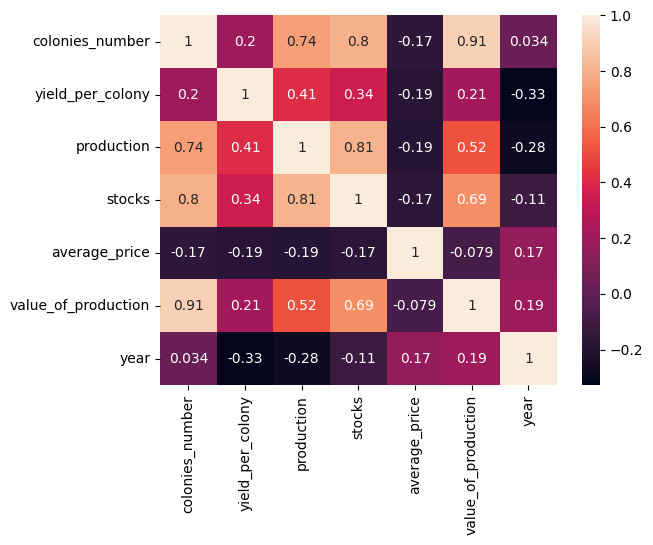

In [37]:
# heatmap for correlations for all data
sns.heatmap(correlations, annot=True)